In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font_path = "C:\Windows\Fonts\gulim.ttc"
kfont = matplotlib.font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont]

pd_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', encoding = 'cp949')
pd_data.columns = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
pd_data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Text(0, 0.5, '무게')

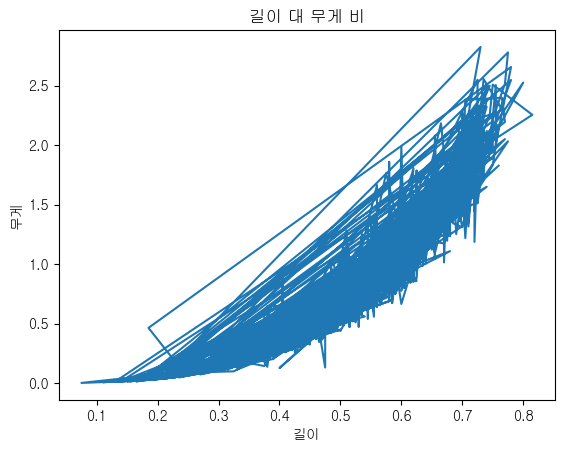

In [32]:
# 길이 대 무게의 비
x = pd_data['length']
y = pd_data['whole weight']
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title('길이 대 무게 비')
plt.xlabel('길이')
plt.ylabel('무게')

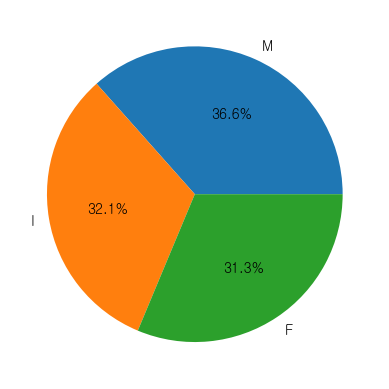

In [19]:
# M, F, I의 비
sex_count = pd_data['sex'].value_counts()

plt.pie(sex_count, labels = sex_count.index, autopct = '%.1f%%')
plt.show()

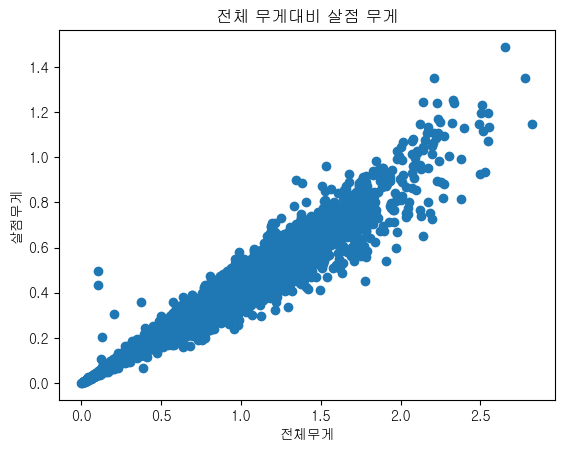

0       0.441242
1       0.378877
2       0.417636
3       0.436585
4       0.401138
          ...   
4171    0.417136
4172    0.454451
4173    0.446854
4174    0.485153
4175    0.485245
Name: shucked_weight_ratio, Length: 4176, dtype: float64


In [33]:
# 전체 무게대비 살점의 무게

# 산점도 그리기
plt.scatter(pd_data['whole weight'], pd_data['shucked weight'])
plt.xlabel('전체무게')
plt.ylabel('살점무게')
plt.title('전체 무게대비 살점 무게')
plt.show()

# 전체무게 대비 살점무게
pd_data['shucked_weight_ratio'] = pd_data['shucked weight'] / pd_data['whole weight']

print(pd_data['shucked_weight_ratio'])

In [26]:
# 암, 수 크기(무게) 비교
# 'I(infant)' 데이터 제거
pd_data_MF = pd_data[pd_data['sex'] != 'I']

abalone_M = pd_data_MF[pd_data_MF['sex'] == 'M']
abalone_F = pd_data_MF[pd_data_MF['sex'] == 'F']

male_weight_mean = abalone_M['whole weight'].mean()
female_weight_mean = abalone_F['whole weight'].mean()
male_length_mean = abalone_M['length'].mean()
female_length_mean = abalone_F['length'].mean()

print('Male average weight:', male_weight_mean)
print('Female average weight:', female_weight_mean)
print('Male average length:', male_length_mean)
print('Female average length:', female_length_mean)

Male average weight: 0.9917721021611001
Female average weight: 1.0465321346595258
Male average length: 0.5614603798297314
Female average length: 0.5790933435348126


In [44]:
# 전복의 나이(rings)와 무게(길이) 관계
result_length = pd_data.groupby('rings')['length'].mean()
result_weight = pd_data.groupby('rings')['whole weight'].mean()

print(result_length)
print(result_weight)

rings
1     0.075000
2     0.150000
3     0.176000
4     0.221491
5     0.285739
6     0.369363
7     0.422033
8     0.498776
9     0.546865
10    0.574629
11    0.599374
12    0.589457
13    0.578892
14    0.580198
15    0.576912
16    0.587537
17    0.601034
18    0.596071
19    0.595625
20    0.603654
21    0.618214
22    0.595000
23    0.587222
24    0.695000
25    0.645000
26    0.600000
27    0.607500
29    0.700000
Name: length, dtype: float64
rings
1     0.002000
2     0.015000
3     0.028400
4     0.059605
5     0.125500
6     0.273174
7     0.397386
8     0.640753
9     0.852013
10    1.008748
11    1.142559
12    1.102904
13    1.075453
14    1.079992
15    1.046118
16    1.133388
17    1.234328
18    1.194333
19    1.166797
20    1.251750
21    1.250607
22    1.221250
23    1.170389
24    1.798750
25    1.406000
26    1.057500
27    1.698000
29    1.807500
Name: whole weight, dtype: float64


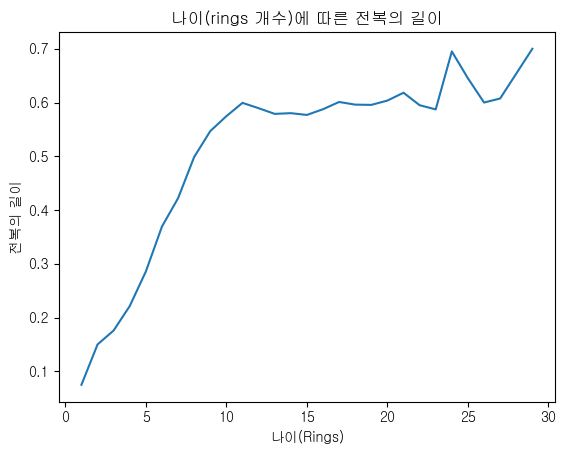

In [43]:
plt.plot(result_length)
plt.xlabel('나이(Rings)')
plt.ylabel('전복의 길이')
plt.title('나이(rings 개수)에 따른 전복의 길이')
plt.show()

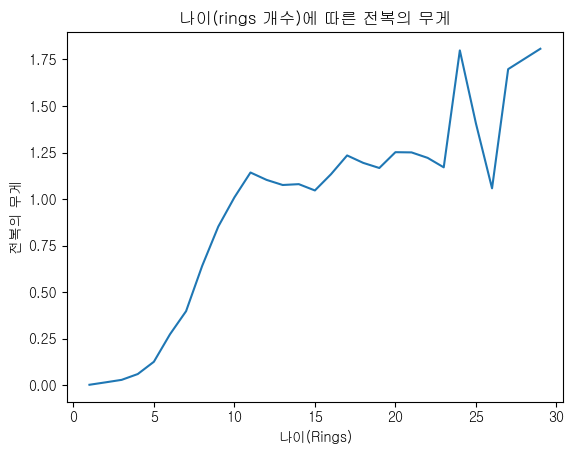

In [45]:
plt.plot(result_weight)
plt.xlabel('나이(Rings)')
plt.ylabel('전복의 무게')
plt.title('나이(rings 개수)에 따른 전복의 무게')
plt.show()